# Plot MAG coverage based on smoothed + virtual reads

Just a phasing debugging thing (why are some of the graphs disconnected?)

In [1]:
%run "Header.ipynb"

In [2]:
import pandas as pd

In [3]:
!minimap2 -ax asm20 --secondary=no --MD \
    /Poppy/mfedarko/sheepgut/seqs/edge_1671.fasta \
    phasing-data/smoothed-reads/edge_1671_smoothed_reads_delignore_vrlow.fasta | \
    samtools view -b | \
    samtools sort -o phasing-data/smoothed-reads/edge_1671_sorted.bam

[M::mm_idx_gen::0.116*1.00] collected minimizers
[M::mm_idx_gen::0.143*1.28] sorted minimizers
[M::main::0.143*1.28] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.154*1.27] mid_occ = 100
[M::mm_idx_stat] kmer size: 19; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.161*1.27] distinct minimizers: 384668 (98.91% are singletons); average occurrences: 1.017; average spacing: 5.506
[M::worker_pipeline::62.960*3.03] mapped 44236 sequences
[M::worker_pipeline::114.212*3.07] mapped 43541 sequences
[M::worker_pipeline::158.533*3.08] mapped 43783 sequences
[M::worker_pipeline::203.674*3.09] mapped 43680 sequences
[M::worker_pipeline::248.721*3.10] mapped 43368 sequences
[M::worker_pipeline::305.905*2.80] mapped 46676 sequences
[M::worker_pipeline::308.527*2.78] mapped 10924 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -ax asm20 --secondary=no --MD /Poppy/mfedarko/sheepgut/seqs/edge_1671.fasta phasing-data/smoothed-reads/edge_1671_smoothed_reads_delign

In [5]:
!samtools depth phasing-data/smoothed-reads/edge_1671_sorted.bam > phasing-data/smoothed-reads/edge_1671_sr2mag_depth.tsv

In [6]:
covs = []
prev_pos = 0
with open("phasing-data/smoothed-reads/edge_1671_sr2mag_depth.tsv", "r") as cf:
    for line in cf:
        seq, pos, cov = line.strip().split()
        pos = int(pos)
        cov = int(cov)
        assert prev_pos + 1 == pos
        covs.append(cov)
        prev_pos = pos

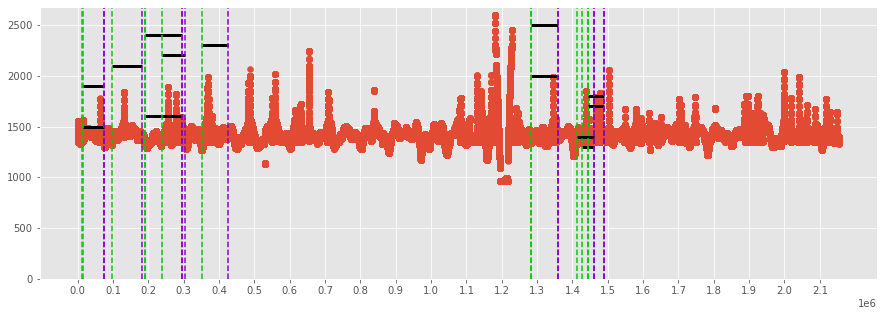

In [20]:
fig, ax = pyplot.subplots()
ax.scatter(range(1, len(covs) + 1), covs)
ax.set_ylim(0)
ax.set_xticks([x * 100000 for x in range(0, 22)])
xmarkers = [
    (1281887, 1358497),
    (190582, 295609), (352798, 425402),
    (238928, 303945), (97145, 182715), (1281887, 1358497),
    (11241, 75077), (1443454, 1489818), (1443454, 1489818), (190582, 295609),
    (13703, 75077), (1413410, 1459932), (1426374, 1459932)
]
# xmarkers = [1281887, 1358497, 190582, 295609, 352798, 425402, 238928, 303945, 97145, 182715,
#            11241, 75077, 1443454, 1489818, 190582, 295609, 1413410, 1459932, 1426374, 1459932]
for xmti, xmt in enumerate(xmarkers):
    ax.axvline(xmt[0], linestyle="--", color="#00cc00")
    ax.axvline(xmt[1], linestyle="--", color="#8800cc")
    ax.hlines(y=(2500 - (xmti * 100)), xmin=xmt[0], xmax=xmt[1], color="#000000", lw=3)
fig.set_size_inches(15, 5)